# TMD A12B for specific eta

In [27]:
pip install -U pysr

Note: you may need to restart the kernel to use updated packages.


Julia and Julia dependencies are installed at first import:

In [32]:
import pysr

Now, let's import everything else as well as the PySRRegressor:


In [33]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
import h5py

# PySR for A12B eta = 8:


In [80]:

file_path = "/Users/hariprashadravikumar/sivers_TMD_PhD_project/save_h5_A12B_A2B/eta_bL_bT_A12B_err.h5"
with h5py.File(file_path, "r") as h5_file:
    # Specify the dataset to extract
    dataset_name = "eta_8_bL_bT_A12B_err"
    data = np.array(h5_file[dataset_name])

# Extract bLbT and A12B
bLbT = data[:, 1:3]  
A12B = data[:, 3]   
A12Berr = data[:, 4]
A12Bweight = [1/sigma**2 for sigma in A12Berr]


#print("bLbT =", bLbT)
#print("A12B =", A12B)
#print("A12Berr =", A12Berr)

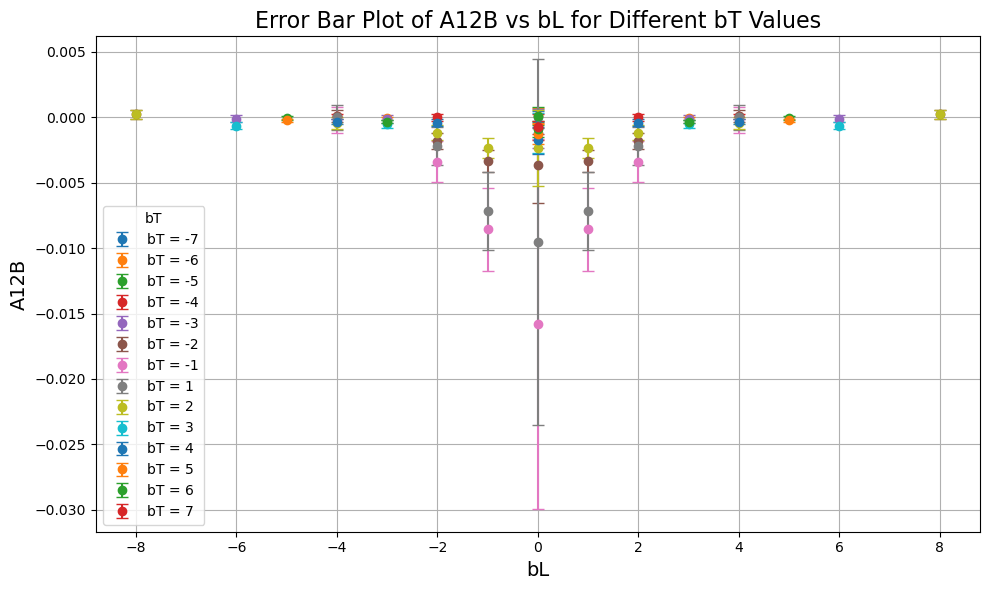

In [139]:

# Extract unique bT values
unique_bT = np.unique(bLbT[:, 1])

# Create the plot
plt.figure(figsize=(10, 6))

for i, bT in enumerate(unique_bT):
    #if bT<1 :
    #    continue
    # Filter data for the current bT value
    mask = bLbT[:, 1] == bT
    bL_values = bLbT[mask, 0]
    A12B_values = A12B[mask]
    A12B_errors = A12Berr[mask]

    # Plot with error bars
    plt.errorbar(
        bL_values,
        A12B_values,
        yerr=A12B_errors,
        fmt='o',
        label=f"bT = {int(bT)}",
        capsize=4
    )
# Add labels, legend, and grid
plt.xlabel("bL", fontsize=14)
plt.ylabel("A12B", fontsize=14)
plt.title("Error Bar Plot of A12B vs bL for Different bT Values", fontsize=16)
plt.legend(title="bT", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


By default, we will set up 30 populations of expressions (which evolve independently except for migrations), use 4 threads, and use `"best"` for our model selection strategy:

In [37]:
default_pysr_params = dict(
    populations=50,
    model_selection="best",
)

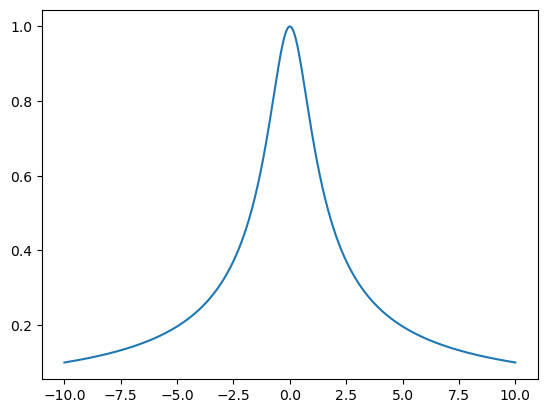

In [52]:
# test try functions
x = np.linspace(-10, 10, 1000)
y = 1 / (np.sqrt(1+x**2))

plt.plot(x, y)
plt.show()

PySR can run for arbitrarily long, and continue to find more and more accurate expressions. You can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**

In [98]:
# Learn equations
from sympy import exp, symbols, Function

# Update the PySRRegressor call
model = PySRRegressor(
    niterations=30,
    binary_operators=["*", "Lorentzian(x, y) = 1/(y+x^2)"],
    unary_operators=["gaussian(x) = exp(-x^2)"],
    extra_sympy_mappings={"gaussian": lambda x: exp(-x**2), "Lorentzian": lambda x, y: 1/(y+x**2)},
    constraints={'^': (-1, 1)}
)
model.fit(bLbT, A12B, weights = A12Bweight, variable_names = ['bL', 'bT']) 

/opt/homebrew/anaconda3/envs/notebook/lib/python3.12/site-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.791e-07  1.594e+01  y = -0.00023425
5           1.476e-07  4.829e-02  y = Lorentzian(bL, -0.94774) * -0.00016439
7           7.448e-08  3.421e-01  y = Lorentzian(bL, bT * bT) * -0.0096743
9           7.327e-08  8.170e-03  y = Lorentzian(bL, (bT * 0.698) * bT) * -0.00789
10          6.629e-08  1.001e-01  y = Lorentzian(bT, 0.99807) * (gaussian(bL * 0.45093) * -0...
                                      .015967)
11          5.841e-08  1.266e-01  y = Lorentzian((bL * bL) * 0.42165, bT * bT) * -0.009681
12          4.559e-08  2.479e-01  y = gaussian(Lorentzian(2.058, bT)) * (Lorentzian(bL, bT *...
                                       bT) * -0.012695)
14          3.518e-08  1.296e-01  y = (Lorentzian(bL, bT * bT) * gaussian(bL * Lorentzian(-2...
                                      .3233, bT))) * -0.013798
17          3.504e-08  1.34

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                     -0.00023425499   
	1        0.048286         Lorentzian(bL, -0.9477387) * -0.0001643925   
	2        0.342066             Lorentzian(bL, bT * bT) * -0.009674293   
	3        0.008170  Lorentzian(bL, (bT * 0.69800156) * bT) * -0.00...   
	4        0.100108  Lorentzian(bT, 0.9980732) * (gaussian(bL * 0.4...   
	5        0.126610  Lorentzian((bL * bL) * 0.4216487, bT * bT) * -...   
	6  >>>>  0.247856  gaussian(Lorentzian(2.057981, bT)) * (Lorentzi...   
	7        0.129608  (Lorentzian(bL, bT * bT) * gaussian(bL * Loren...   
	8        0.001340  gaussian(Lorentzian(2.057981, bT) * (gaussian(...   
	9        0.034249  (gaussian(bL * ((Lorentzian(-2.3352706, bT) * ...   
	
	           loss  complexity  
	0  1.790708e-07           1  
	1  1.476195e-07           5  
	2  7.447817e-08           7  
	3  7.327109e-08           9  
	4  6.629126e-08          10  
	5  5.840771e-08          11  
	6  4.558561e-08          12  
	7  3.517643e-08          14  
	8  3.503526e-08          17  
	9  3.161429e-08          20  
]

  - outputs/20250128_152352_hbp6NW/hall_of_fame.csv


We can print the model, which will print out all the discovered expressions:

We can also view the SymPy format of the best expression:

In [138]:
model.sympy()

exp(-0.0557486758541179/(0.236111575010879*bT + 1)**2)*(-0.012694817)/(bL**2 + bT*bT)

We can also view the SymPy of any other expression in the list, using the index of it in `model.equations_`.

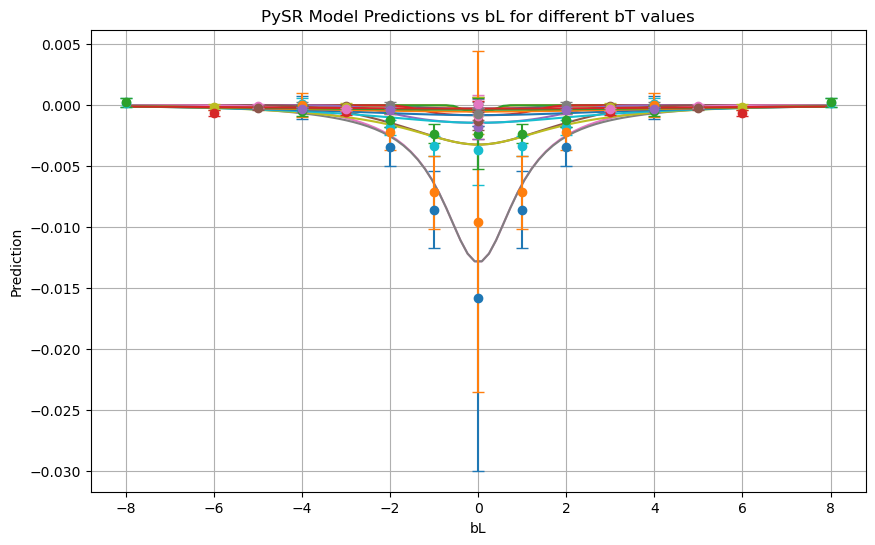

exp(-0.00113058262198063*bL**4/(0.18336885638109*bT + 1)**4)*(-0.012873659)/(bL**2 + bT*bT)

In [159]:
pick = 9


bL_plot = np.linspace(-8,8, 100)
plt.figure(figsize=(10, 6))
for bT in unique_bT:
    bLbT_plot = np.array([[bL, bT] for bL in bL_plot])
    predictions = model.predict(bLbT_plot, pick)
    plt.plot(bL_plot, predictions)
for i, bT in enumerate(unique_bT):
    #if bT<1 :
    #    continue
    # Filter data for the current bT value
    mask = bLbT[:, 1] == bT
    bL_values = bLbT[mask, 0]
    A12B_values = A12B[mask]
    A12B_errors = A12Berr[mask]

    # Plot with error bars
    plt.errorbar(
        bL_values,
        A12B_values,
        yerr=A12B_errors,
        fmt='o',
        capsize=4
    )
plt.xlabel("bL")
plt.ylabel("Prediction")
plt.title("PySR Model Predictions vs bL for different bT values")
#plt.legend(title="bT Values")
plt.grid(True)
plt.show()

model.sympy(pick)

In [155]:
model.equations_[["complexity", "loss", "equation"]]

complexity          loss                                           equation
0           1  1.790708e-07                                     -0.00023425499
1           5  1.476195e-07         Lorentzian(bL, -0.9477387) * -0.0001643925
2           7  7.447817e-08             Lorentzian(bL, bT * bT) * -0.009674293
3           9  7.327109e-08  Lorentzian(bL, (bT * 0.69800156) * bT) * -0.00...
4          10  6.629126e-08  Lorentzian(bT, 0.9980732) * (gaussian(bL * 0.4...
5          11  5.840771e-08  Lorentzian((bL * bL) * 0.4216487, bT * bT) * -...
6          12  4.558561e-08  gaussian(Lorentzian(2.057981, bT)) * (Lorentzi...
7          14  3.517643e-08  (Lorentzian(bL, bT * bT) * gaussian(bL * Loren...
8          17  3.503526e-08  gaussian(Lorentzian(2.057981, bT) * (gaussian(...
9          20  3.161429e-08  (gaussian(bL * ((Lorentzian(-2.3352706, bT) * ...